# $k$-nearest neighbours and dimensionality reduction

Load the MNIST Dataset

In [1]:
import matplotlib.pyplot as plt
import mnist
import numpy as np
train_set = mnist.train_images()
train_labels = mnist.train_labels()
print(train_set.shape)
print(train_labels.shape)
test_set = mnist.test_images()
test_labels = mnist.test_labels()

test_set = 1.0*np.squeeze(np.array([np.reshape(i,(1,-1)) for i in test_set]))
train_set = 1.0*np.squeeze(np.array([np.reshape(i,(1,-1)) for i in train_set]))
print(test_set.shape)
print(train_set.shape)

(60000, 28, 28)
(60000,)
(10000, 784)
(60000, 784)


Choose 100 examples of each class from the test set, and 1000 from the training set.

In [72]:
train_index = []
test_index = []
for i in range(10):
    train_index.append(np.where(train_labels==i)[0][0:1000])
    test_index.append(np.where(test_labels==i)[0][0:100])
train_index = [item for sublist in train_index for item in sublist]
test_index = [item for sublist in test_index for item in sublist]

train_data = train_set[train_index]
train_class = train_labels[train_index]
test_data = test_set[test_index]
test_class = test_labels[test_index]
print(test_data.shape)
print(train_data.shape)

(1000, 784)
(10000, 784)


## Nearest neighbour classification

We will use $k=5$ here. Note that this means the training accuracy is not perfect (it is for $k=1$).

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_data, train_class)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Check the training accuracy

In [74]:
train_score = knn.score(train_data, train_class)
test_score = knn.score(test_data, test_class)
print('Training score: {:5.3f}'.format(train_score))
print('Test score: {:5.3f}'.format(test_score))

Training score: 0.968
Test score: 0.917


This gives us a baseline to compare against.

Now we reduce the dimension of the problem using a random projection. We repeat multiple times, for different numbers of projections and for each one we record:

* Training score
* Test score
* Inference time on test set

<Figure size 432x288 with 0 Axes>

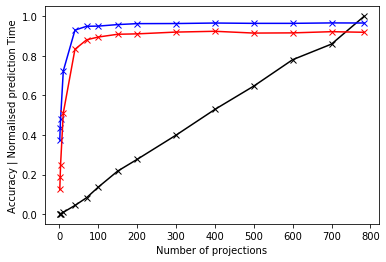

<Figure size 432x288 with 0 Axes>

In [91]:
from sklearn.preprocessing import normalize
import time
nprojections = [1,2,3,10, 40,70,100,150,200,300,400,500,600,700,784]
testscores = []
trainscores = []
testtime = []
for n in nprojections:
    R = np.random.randn(784,n)
    R = normalize(R, axis=0)
    rtrain = np.matmul(train_data, R)
    rtest = np.matmul(test_data, R)
    knn.fit(rtrain, train_class)
    trainscores.append(knn.score(rtrain, train_class))
    start = time.time()
    testscores.append(knn.score(rtest, test_class))
    end = time.time()
    testtime.append(end - start)

plt.figure()
plt.plot(nprojections, testtime/max(np.array(testtime)), 'kx-')
plt.plot(nprojections, trainscores, 'bx-' )
plt.plot(nprojections, testscores, 'rx-' )
plt.xlabel('Number of projections')
plt.ylabel('Accuracy | Normalised prediction Time')
plt.figure()
plt.savefig('../figures/classification/knn-random-performance.pnf')
